Author: @Kosmas Kanellakis

Student Code: t8200053

e-mail: t8200053@aueb.gr

Date: 27/10/2023

# Instructions

You need to have the .csv files downloaded in the same folder as the "Assignment1.ipynb"
* listings.csv
* calendar.csv
* reviews.csv

You also need to have imported the libraries into your system
* pandas
* matplotlib
* folium

# Import libraries and load file

In [1]:
# Import pandas library
import pandas as pd
import matplotlib.pyplot as plt
import folium as fol
from branca.element import IFrame

# Load the data
df_listings = pd.read_csv('./listings.csv')
df_calendar = pd.read_csv('./calendar.csv')
df_reviews = pd.read_csv('./reviews.csv')

## Neighbourhood Listings in Descending Order

Show the listings per neighbourghood, with the most popular neighbourhoods first (that is, in decreasing neighbourhood popularity order).

In [2]:
# Group the data by neighbourhood and count the number of listings in each neighbourhood
neighbourhood_counts = df_listings['neighbourhood_cleansed'].value_counts()

# Display the neighbourhoods in descending order of popularity
neighbourhood_counts = neighbourhood_counts.sort_values(ascending=False)

# Print the result
print(neighbourhood_counts)

neighbourhood_cleansed
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              2416
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 1122
ΝΕΟΣ ΚΟΣΜΟΣ                          980
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             979
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     817
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                      583
ΠΑΓΚΡΑΤΙ                             511
ΑΜΠΕΛΟΚΗΠΟΙ                          452
ΚΟΛΩΝΑΚΙ                             425
ΘΗΣΕΙΟ                               386
ΑΚΡΟΠΟΛΗ                             386
ΠΕΤΡΑΛΩΝΑ                            352
ΚΕΡΑΜΕΙΚΟΣ                           343
ΚΥΨΕΛΗ                               271
ΣΤΑΔΙΟ                               252
ΓΟΥΔΙ                                230
ΙΛΙΣΙΑ                               216
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                     180
ΝΙΡΒΑΝΑ                              174
ΠΑΤΗΣΙΑ                              166
ΛΥΚΑΒΗΤΤΟΣ                           162
ΖΑΠΠΕΙΟ                              161
ΑΝΩ ΚΥΨΕΛΗ                           119
ΓΚΥΖΗ                             

## Neighbourhood Prices in Descending Order

Create a table with the prices per neighbourhood. The prices information should contain:

* median price per neighbourhood

* mean price per neighbourhood

* standard deviation per neighbourhood

* number of listings per neighbourhood.

The contents of the table should be in descending median prices.

In [3]:
# Convert the price column to numeric values
df_listings['price'] = df_listings['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate median, mean, standard deviation and count of listings per neighbourhood
price_info = df_listings.groupby('neighbourhood_cleansed')['price'].agg(['median', 'mean', 'std', 'count'])

# Sort the table by median price in descending order
sorted_price_info = price_info.sort_values(by='median', ascending=False)

# Display the result
print(sorted_price_info)

                                  median        mean          std  count
neighbourhood_cleansed                                                  
ΡΗΓΙΛΛΗΣ                           120.0  367.800000   578.622675      5
ΖΑΠΠΕΙΟ                            114.0  224.068323   641.163173    161
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ             104.0  140.650662   229.183015   2416
ΑΚΡΟΠΟΛΗ                           100.0  195.344560   703.321565    386
ΚΟΛΩΝΑΚΙ                           100.0  128.595294   104.431349    425
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 90.5  120.284314   104.613533   1122
ΘΗΣΕΙΟ                              90.0  126.492228   124.176775    386
ΚΕΡΑΜΕΙΚΟΣ                          89.0  123.883382   136.367487    343
ΛΥΚΑΒΗΤΤΟΣ                          75.0  104.561728    87.859850    162
ΓΚΑΖΙ                               70.5   95.792453    75.355882    106
ΣΤΑΔΙΟ                              70.0  121.515873   509.991840    252
ΙΛΙΣΙΑ                              70.0   87.18981

## Availability per Day

Create a plot with the number of listings available per day, on the $y$ axis, and the date, on the $x$ axis.

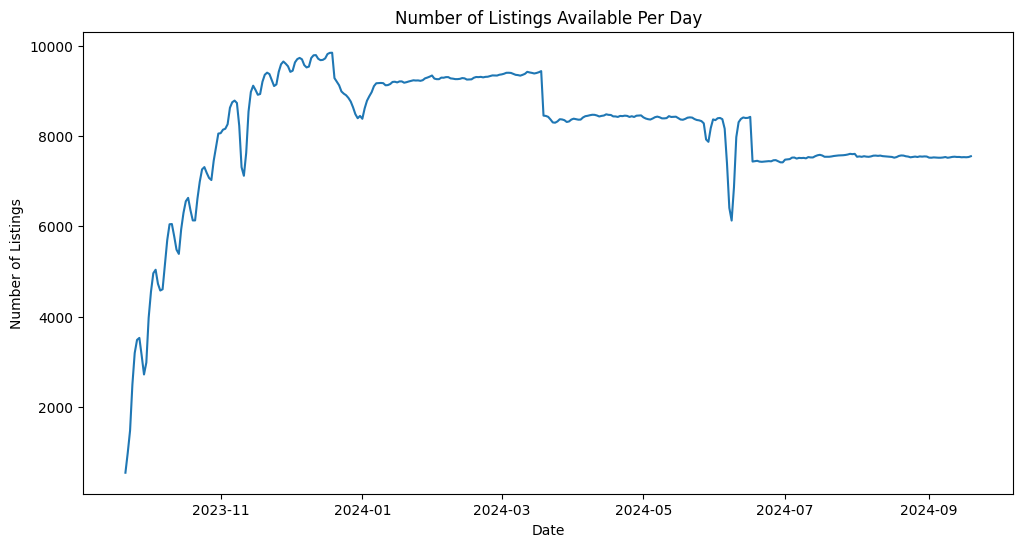

In [4]:
# Convert the 'date' column to datetime format
df_calendar['date'] = pd.to_datetime(df_calendar['date'])

# Filter the data for available listings
available_listings = df_calendar[df_calendar['available'] == 't']

# Group by date and count the number of listings for each day
availability_per_day = available_listings.groupby(df_calendar['date'].dt.date)['listing_id'].count()

# Plot the data
plt.figure(figsize=(12,6))
availability_per_day.plot()
plt.title('Number of Listings Available Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Listings')
plt.show()



## Reviews, Occupacy per Listing, Average Income

Create a histogram showing the number of reviews per listing. The histogram should bin the number of reviews, from the smallest amount of reviews in a listing, to the maximum number of reviews in a listing rounded up to the closest hundred.

Once you have done that, calculate the average occupacy per listing per month. To calculate that, find the average reviews per month and assume that half of the bookings result in reviews.

Then, assuming that each booking is for a three nights stay, calculate the average income per month, using the average price charged throughout all listings.

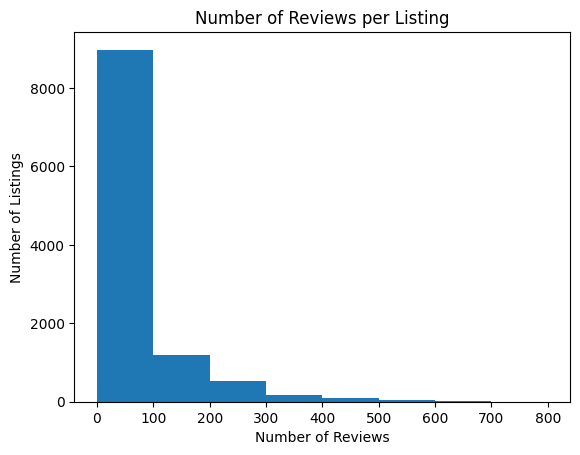

listing_id
10595                  818.693060
10990                 1093.540015
10993                 1195.551770
10995                  903.752079
27262                 1070.598617
                         ...     
975413215364080586    2651.006098
975966554881091774     662.751525
976076532701121190     662.751525
977373669051180593    1325.503049
979596287508787842     662.751525
Length: 10999, dtype: float64


In [5]:
# Convert 'date' column to datetime
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

# Create a histogram showing the number of reviews per listing
reviews_per_listing = df_reviews['listing_id'].value_counts()
plt.hist(reviews_per_listing, bins=range(0, reviews_per_listing.max(), 100))
plt.title('Number of Reviews per Listing')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Listings')
plt.show()

# Calculate the average occupancy per listing per month
df_reviews['month_year'] = df_reviews['date'].dt.to_period('M')
average_reviews_per_month = df_reviews.groupby(['listing_id', 'month_year']).size().groupby('listing_id').mean()
average_occupancy_per_month = average_reviews_per_month * 2  # assuming half of the bookings result in reviews

# Assuming each booking is for a three nights stay
average_price = df_listings['price'].mean()
average_income_per_month = average_occupancy_per_month * 3 * average_price
print(average_income_per_month)


## Listings per Room Type

Show the number of listings per room type, in absolute numbers, and also in percentages (the percentage of listings for each particular room type). Then, show the number of listings per neighrbourhood and room type.

In [6]:
# Calculate the number of listings per room type
room_type_counts = df_listings['room_type'].value_counts()
print("Number of listings per room type:")
print(room_type_counts)

# Calculate the percentage of listings for each room type
room_type_percentages = df_listings['room_type'].value_counts(normalize=True) * 100
print("\nPercentage of listings per room type:")
print(room_type_percentages)

# Calculate the number of listings per neighbourhood and room type
neighbourhood_room_type_counts = df_listings.groupby(['neighbourhood_cleansed', 'room_type']).size()
print("\nNumber of listings per neighbourhood and room type:")
print(neighbourhood_room_type_counts)

Number of listings per room type:
room_type
Entire home/apt    11652
Private room        1113
Hotel room           105
Shared room           85
Name: count, dtype: int64

Percentage of listings per room type:
room_type
Entire home/apt    89.942107
Private room        8.591277
Hotel room          0.810498
Shared room         0.656117
Name: proportion, dtype: float64

Number of listings per neighbourhood and room type:
neighbourhood_cleansed            room_type      
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                    Entire home/apt     55
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                  Entire home/apt     33
                                  Private room         5
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  Entire home/apt    686
                                  Hotel room           4
                                                    ... 
ΣΤΑΔΙΟ                            Private room        11
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                   Entire home/apt     73
                                  Hotel room           4
                

## Prices per Day

Create a table with the average price per listing per day. Draw a graph visualizing the table.

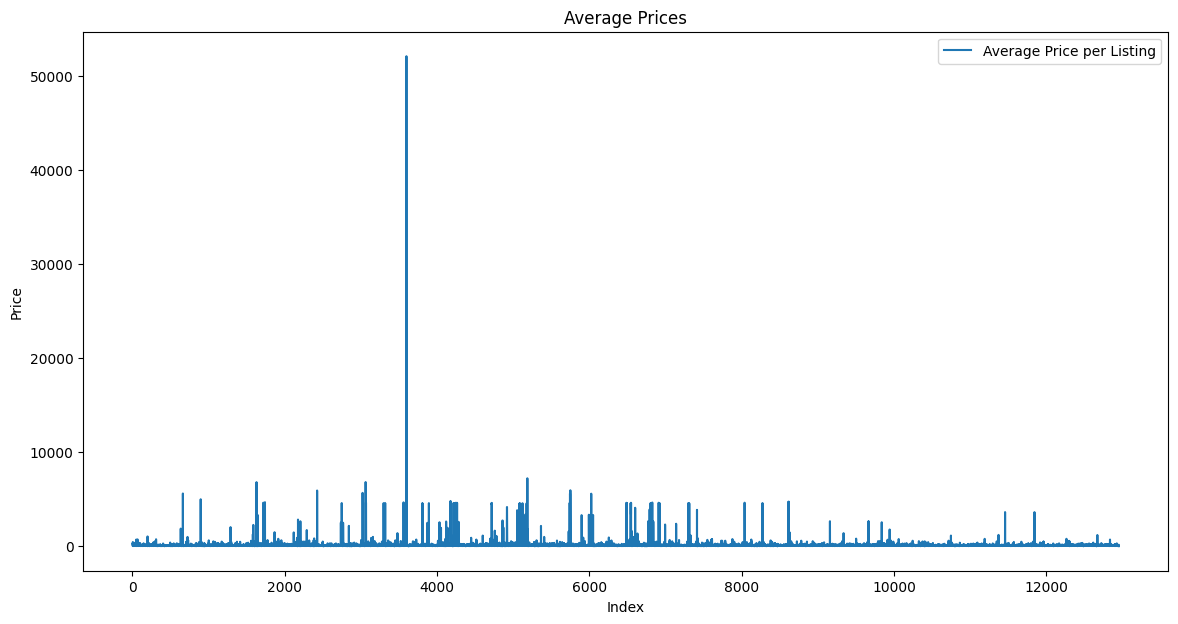

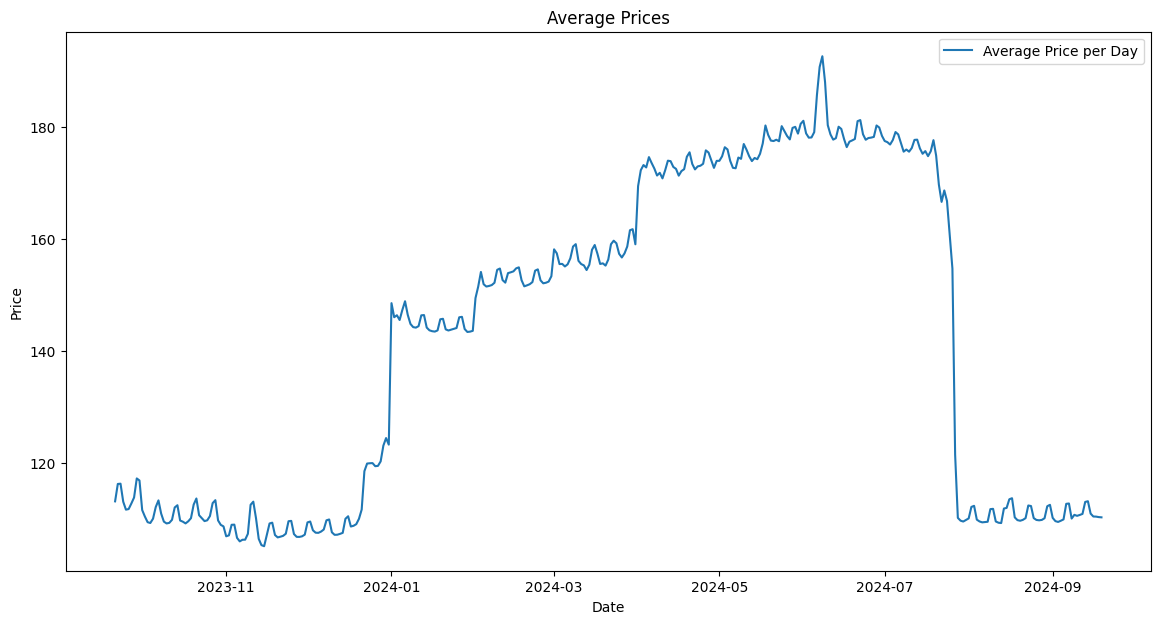

In [7]:
# Clean the 'price' column and convert it to float
df_calendar['price'] = df_calendar['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate average price per listing
avg_price_per_listing = df_calendar.groupby('listing_id')['price'].mean()

# Calculate average price per day
avg_price_per_day = df_calendar.groupby('date')['price'].mean()

# Create a new DataFrame for the averages
average_prices_per_listing = pd.DataFrame({
    'Average Price per Listing': avg_price_per_listing,
})
average_prices_per_day = pd.DataFrame({
    'Average Price per Day': avg_price_per_day,
})

# Reset index of DataFrame
average_prices_per_listing_reset = average_prices_per_listing.reset_index()
average_prices_per_day_reset = average_prices_per_day.reset_index()

# Plotting the data per listing
plt.figure(figsize=(14, 7))
plt.plot(average_prices_per_listing_reset['Average Price per Listing'], label='Average Price per Listing')
plt.title('Average Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting the data per day
plt.figure(figsize=(14, 7))
plt.plot(average_prices_per_day_reset['date'], average_prices_per_day_reset['Average Price per Day'], label='Average Price per Day')
plt.title('Average Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Listings per Host

Create a table with the number of listings per host, in descending order. Create a graph that will show the distribution of listings per host, as follows:

* You will rank the host on a number of listings basis. So, the first host will be the one with the largest number of listings, the second host will be the one with the second largest number of listings, etc. If there is a number of hosts with the same listings, just add them in sequence. For instance, if there are 10 hosts with one listing each, add them in the ranking with any order between them.

* On the $y$ axis you will have the number of listings.

That is, a point $(x, y)$ will mean that the $x$-th highest hosting host has $y$ listings.

After you have drawn the plot, do another one, this time with the $x$ axis in *logarithmic* scale.

         host_id  calculated_host_listings_count
526     20104194                             114
1072   113548208                              88
909     90390850                              78
155       748818                              74
460     47267002                              61
...          ...                             ...
3629   243395661                               1
3627   246158325                               1
3617   193918564                               1
3614     7547077                               1
12951  537287187                               1

[5774 rows x 2 columns]


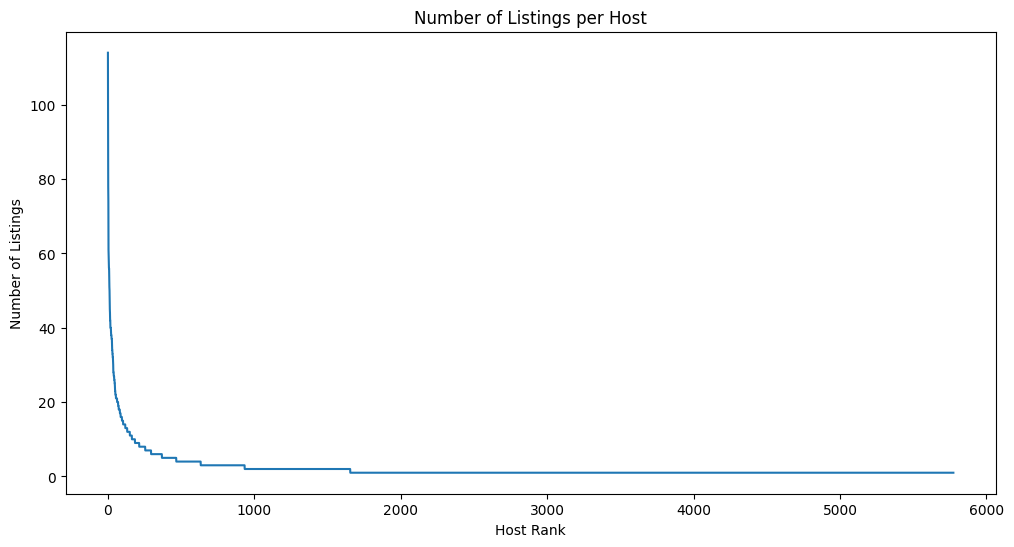

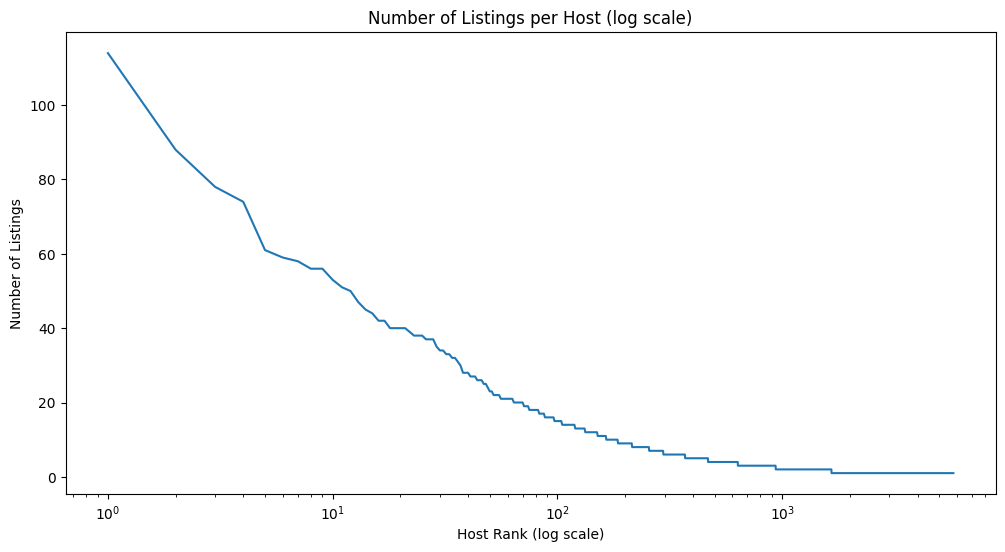

In [8]:
# Drop duplicates
host_listings = df_listings.drop_duplicates(subset='host_id')

# Sort by calculated_host_listings_count in descending order
sorted_listings_per_host = host_listings.sort_values(by='calculated_host_listings_count', ascending=False)

# Display the table
print(sorted_listings_per_host[['host_id', 'calculated_host_listings_count']])

# Create the plot
plt.figure(figsize=(12,6))
plt.plot(range(1, len(sorted_listings_per_host) + 1), sorted_listings_per_host['calculated_host_listings_count'])
plt.xlabel('Host Rank')
plt.ylabel('Number of Listings')
plt.title('Number of Listings per Host')
plt.show()

# Create the plot with x axis in logarithmic scale
plt.figure(figsize=(12,6))
plt.plot(range(1, len(sorted_listings_per_host) + 1), sorted_listings_per_host['calculated_host_listings_count'])
plt.xscale('log')
plt.xlabel('Host Rank (log scale)')
plt.ylabel('Number of Listings')
plt.title('Number of Listings per Host (log scale)')
plt.show()


## Visualize Listings

Draw an interactive map to show the listings ovelayed on Athens.

You can use the [folium](https://github.com/python-visualization/folium) library to create your map; spend some time reading the documentation.

The map should show each listing and on clicking on top of it, the user should see a short description of the listing.

Note that such a map is heavy on resources. You will probably *not* be able to include it in a Jupyter notebook, so you should save it to an external HTML file that can be opened by any browser. Also, to make things easier, you make wish to limit the maximum zoom level from 12 to 15 (after you read folium's documentation you will know what this is).

Hint: be careful witht he description data, if they contain some characters they may not be rendered in HTML and may destroy your output.

In [9]:
# Create a map centered around Athens
m = fol.Map(location=[37.9838, 23.7275], zoom_start=12, max_zoom=15)

# Iterate over each row in the DataFrame to add markers to the map
for index, row in df_listings.iterrows():
    # Check if the description is a string
    if isinstance(row['description'], str):
        # Clean up the description to remove any characters that might break HTML
        description = row['description'].replace('"', '&quot;').replace("'", '&#39;')
    else:
        description = 'No description available'
    
    # Create an iframe with the description as its content
    iframe = IFrame(description, width=500, height=300)
    
    # Add a circle marker (dot) for this listing with a popup attached
    fol.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,  # Defines the radius of the circle marker in pixels.
        fill=True,
        popup=fol.Popup(iframe),  # Use the iframe as the content of the popup
        tooltip=row['name'],
    ).add_to(m)

# Save the map to an HTML file
m.save('map.html')
